# **Dog Identification Study Notebook**

## Objectives

*   Answer business requirement 1: 
    * The client would like to have a study of the dataset collected.
* Organizing data.

## Inputs

* images/train/
* labels.csv

## Outputs

* Graph with the total count of breeds.
* breeds.pkl
* n_breeds.pkl
* breeds_dict.pkl
* Number of images plot






---

# Importing all the packages / libraries we need

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import os
import pickle

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/home/jaaz/Desktop/project-5/TailTeller/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("New current directory:", os.getcwd())

New current directory: /home/jaaz/Desktop/project-5/TailTeller


---

# Load data to see the axes

Since the data is image-based, we'll use a Python library like PIL to load an example image to understand the structure, we can see the images have different sized, therefore different numbers in the X and Y axes. We will have to normalize the images in the future.

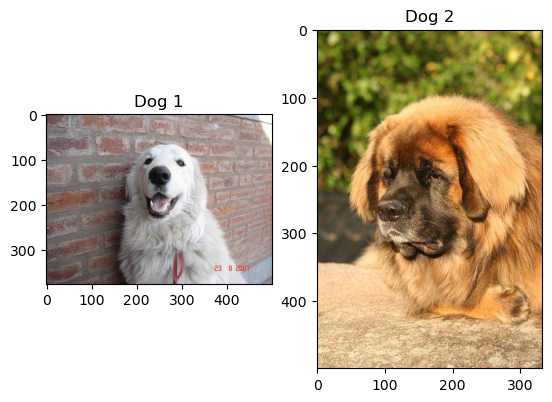

In [4]:
# Load the first image
image_path1 = 'images/train/0a0c223352985ec154fd604d7ddceabd.jpg'
image1 = Image.open(image_path1)
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Dog 1")

# Load the second image
image_path2 = 'images/train/0e24a584e10db2c8f827ab00772e29cf.jpg'
image2 = Image.open(image_path2)
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title("Dog 2")
plt.show()

In the following code we will check a countplot graph on the dog breeds, as we checked in the previous notebook the Scottish Deerhound is the top count with 126 entries:

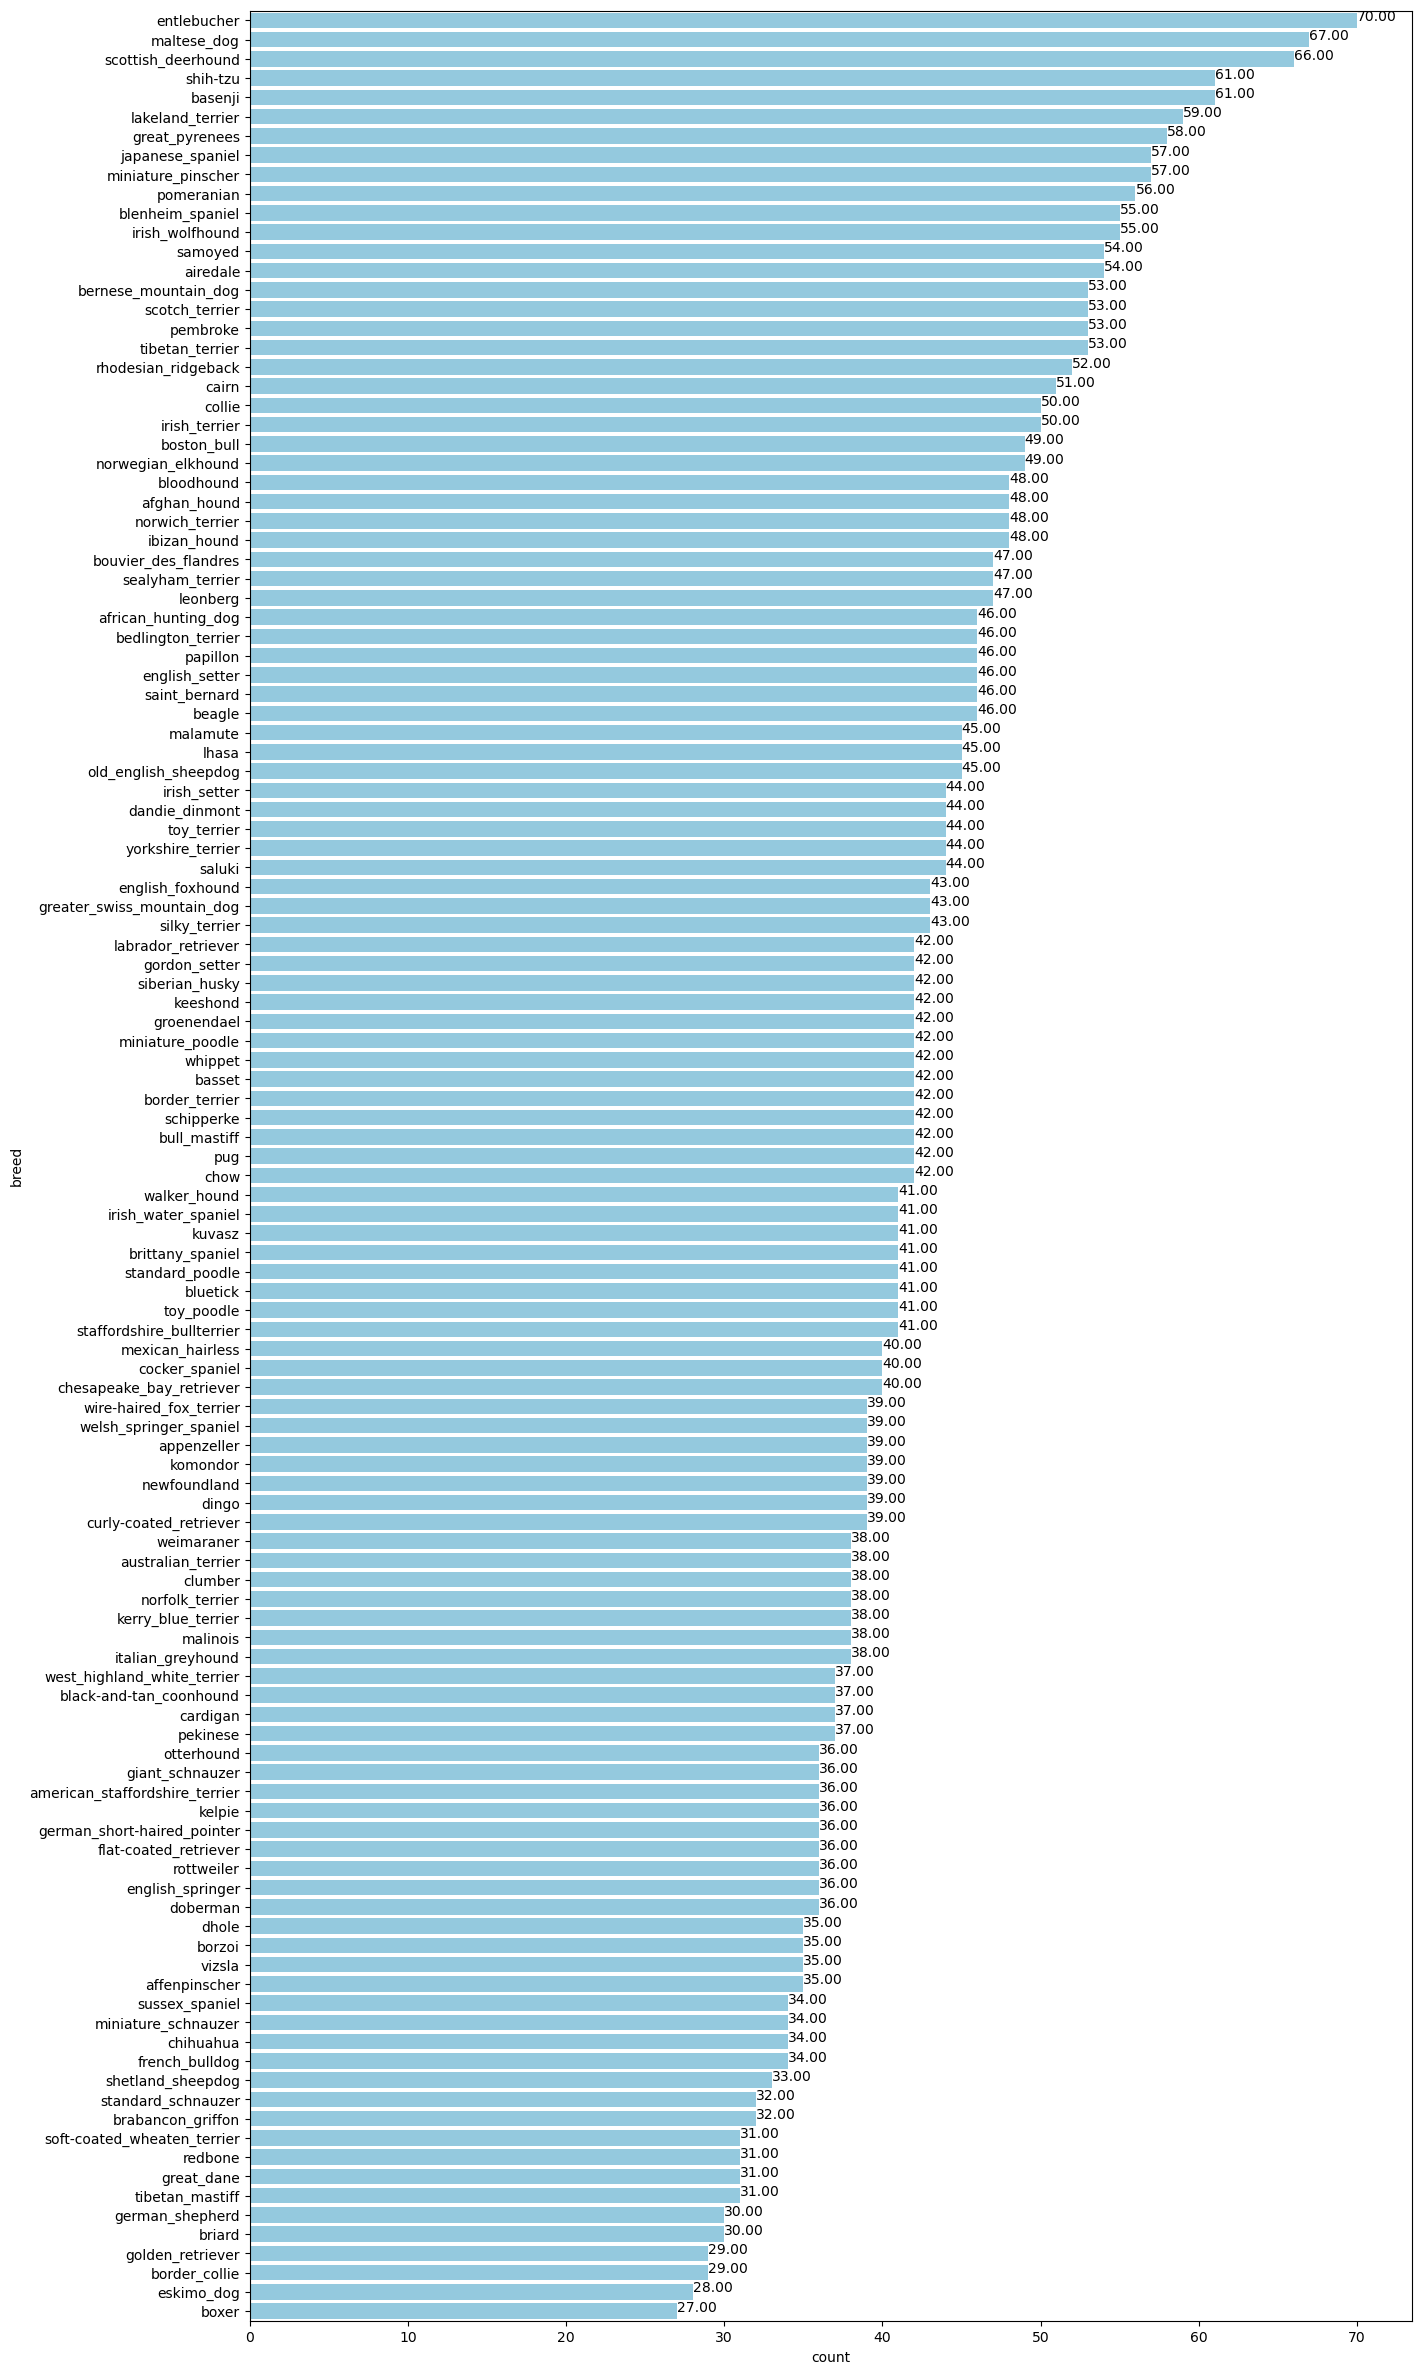

In [5]:
labels = pd.read_csv('labels.csv')

def annotate_bars(ax):
    """
    Annotate the bars with their respective widths.
    
    Parameters:
    ax (matplotlib.axes.Axes): The axes to annotate.
    """
    if not ax.patches:
        print("No bar to annotate.")
        return
    
    for p in ax.patches:
        val = p.get_width()
        x = p.get_x() + val
        y = p.get_y() + p.get_height()/2
        ax.annotate(f'{val:.2f}', (x, y))

# Define the directory of the train images
train_dir = 'images/train'

# Get a list of all file names in the train directory
files = os.listdir(train_dir)

# Remove the file extension from each file name to get the image ID
image_ids = [os.path.splitext(file)[0] for file in files]

# Create a DataFrame from the image IDs
df = pd.DataFrame(image_ids, columns=['id'])

# Merge the image IDs with the labels to get the breed for each image
df = pd.merge(df, labels, on='id')

plt.figure(figsize=(15, 30))
ax0 = sns.countplot(y=df['breed'], order=df['breed'].value_counts().index, color='skyblue')
annotate_bars(ax0)
plt.show()

### Let's examine how many images are there in the train/ and test/ folders

Total dataset balance report:
Number of images in the train dataset: 5111
Number of images in the test dataset: 5111





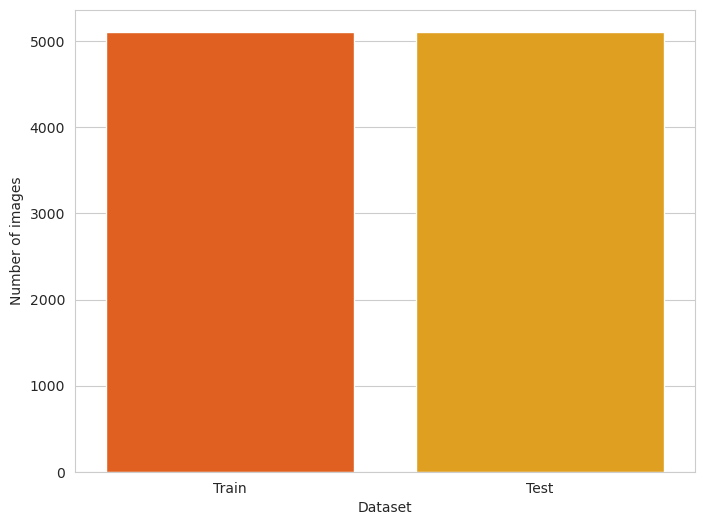

In [6]:
train_dir = 'images/train/'
test_dir = 'images/test/'

# Count the number of images in each directory
num_train_images = len(os.listdir(train_dir))
num_test_images = len(os.listdir(test_dir))

report = "Total dataset balance report:\n"
report += f"Number of images in the train dataset: {num_train_images}\n"
report += f"Number of images in the test dataset: {num_test_images}\n"


data = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Number of images': [num_train_images, num_test_images]
})

# Printing the report
print(report)
print("\n")

# Create a bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Dataset', y='Number of images', palette='autumn')
plt.show()

In [7]:
# Get the number of unique breeds
number_breeds = df['breed'].nunique()

# Print the number of unique breeds
print(f'There are {number_breeds} unique breeds.')

There are 120 unique breeds.


We have a total of 120 unique breeds and at least 27 images per breed category.

## Let's organize the breeds in a way the machine understands doing the following:
* Select the 'breed' column from the 'labels' DataFrame we created before from the file 'labels.csv'.
* Create a set from the 'breed' column, this will delete any duplicates because a set returns only unique values.
* Sorting the list of unique breeds ascending in alphabetical order.

In [8]:
breeds = sorted(list(set(labels['breed'])))
n_breeds = len(breeds)
# Here we can check that n_breeds returns exactly 120 unique breeds
print('Number of breeds:', n_breeds)

# Saving the variables to a file because they will be used in future code
with open('breeds.pkl', 'wb') as f:
    pickle.dump(breeds, f)

with open('n_breeds.pkl', 'wb') as f:
    pickle.dump(n_breeds, f)

Number of breeds: 120


Now Let's take both variables and make a dictionary that can be used to map each breed to a unique integer. This is important when working with categorical data.
We will:
* Generate a sequence of integers with range().
* Pair each breed with a corresponding integer from the range with zip().
* Convert into a dictionary, each tuple becomes a key-value pair.

In [9]:
breed_dict = dict(zip(breeds, range(n_breeds)))

# Saving the variable to a file because it will be used in future code
with open('breed_dict.pkl', 'wb') as f:
    pickle.dump(breed_dict, f)

#Show a sample of the dictionary
breed_dict

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

---

# Conclusions and Next steps

The analysis of the dog identification study has successfully organized and visualized the dataset, confirming the integrity of the data with a matching number of images and labels. The dataset consists of 5,111 images per folder (train and test) spread across 120 unique breeds, with a minimum representation threshold of 27 per breed category. The creation of a dictionary to map each breed to a unique integer has prepared the dataset for more advanced data handling and machine learning operations.

## Next steps:

- Encoding and Normalization

    * Apply Encoding: Implement one-hot encoding for the breed labels to facilitate the model's learning process.
    * Normalize Features: Scale the feature vectors to ensure that the model treats all features with equal importance during training, this is crucial when working with neural networks.

- Feature Engineering

    * Extract Features: Utilize image processing techniques to extract meaningful features from the dog images that could be useful for breed identification.

---